In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# 시드 고정
random.seed(42)
np.random.seed(42)

# 고객 수 및 주문 수
num_customers = 500
num_orders = 5000

# 고객 ID 목록
customer_ids = [f"C{str(i).zfill(4)}" for i in range(1, num_customers + 1)]

# 날짜 범위
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)

# 카테고리, 디바이스, 채널, 할인 여부 목록
product_categories = ['Electronics', 'Fashion', 'Beauty', 'Grocery', 'Books', 'Sports']
devices = ['Mobile', 'Desktop', 'Tablet']
channels = ['Website', 'App', 'Offline']

# 주문 데이터 생성
orders = []
for _ in range(num_orders):
    cust_id = random.choice(customer_ids)
    order_date = start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days))
    amount = round(np.random.exponential(scale=100), 2)
    category = random.choice(product_categories)
    device = random.choices(devices, weights=[0.6, 0.3, 0.1])[0]
    discount_used = random.choices([0, 1], weights=[0.7, 0.3])[0]
    channel = random.choices(channels, weights=[0.5, 0.4, 0.1])[0]

    orders.append([
        cust_id, order_date, amount, category, device, discount_used, channel
    ])

# 데이터프레임 구성
df_orders = pd.DataFrame(orders, columns=[
    "customer_id", "order_date", "amount", "category", "device", "discount_used", "channel"
])

# 날짜 타입 변환
df_orders["order_date"] = pd.to_datetime(df_orders["order_date"])

# 결과 확인
print(df_orders.head())

  customer_id order_date  amount     category   device  discount_used  channel
0       C0328 2022-04-13  159.23  Electronics   Mobile              0  Website
1       C0378 2022-09-28  131.67  Electronics  Desktop              1  Website
2       C0217 2023-12-02   90.84  Electronics   Mobile              0      App
3       C0014 2022-05-02   16.96        Books   Mobile              0      App
4       C0113 2022-11-27   61.48      Grocery   Mobile              1  Website


In [2]:
df_orders

,customer_id,order_date,amount,category,device,discount_used,channel
0,C0328,2022-04-13,159.23,Electronics,Mobile,0,Website
1,C0378,2022-09-28,131.67,Electronics,Desktop,1,Website
2,C0217,2023-12-02,90.84,Electronics,Mobile,0,App
3,C0014,2022-05-02,16.96,Books,Mobile,0,App
4,C0113,2022-11-27,61.48,Grocery,Mobile,1,Website
...,...,...,...,...,...,...,...
4995,C0313,2023-02-28,283.25,Grocery,Desktop,0,Website
4996,C0387,2023-01-17,20.56,Beauty,Mobile,0,App
4997,C0457,2023-11-05,516.52,Sports,Mobile,0,Website
4998,C0392,2022-10-04,15.00,Grocery,Mobile,1,App


#### 고객 구매 패턴 확인 - 구매패턴의 주기

In [ ]:
import matplotlib.pyplot as plt
# 월별, 주별, 요일별로 집계하여 구매 패턴을 분석하기 위한 전처리 작업
# 날짜를 기반으로 월, 주, 요일을 추출하고, 이를 바탕으로 주문 수를 집계하여 구매 활동을 시간대별로 분석할 수 있도록 준비

df_orders['year_month']=df_orders['order_date'].dt.to_period('M') 
df_orders['year_week']=df_orders['order_date'].dt.strftime('%Y-%U')
df_orders['weekday']=df_orders['order_date'].dt.dayofweek # 0 monday
weekday_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
## 전체 집계
total_monthly=df_orders.groupby('year_month').size().reset_index(name='total_orders')
total_weekly=df_orders.groupby('year_week').size().reset_index(name='total_orders')
weekday_counts=df_orders.groupby('weekday').size().reindex(range(7), fill_value = 0).reset_index(name='total_orders')
weekday_counts['weekday_label'] = weekday_labels


### `datetime` 함수 예시

1. **`to_period()`**
   - **용도**: 날짜를 특정 기간 형식으로 변환
   - **예시**: 
     ```python
     df['year_month'] = df['order_date'].dt.to_period('M')
     # '2025-05-01' → '2025-05' 형식으로 변환
     ```

2. **`strftime()`**
   - **용도**: 날짜를 지정된 형식의 문자열로 변환
   - **예시**:
     ```python
     df['year_week'] = df['order_date'].dt.strftime('%Y-%U')
     # '2025-05-01' → '2025-18' (2025년 18번째 주)
     ```

3. **`dayofweek()`**
   - **용도**: 요일을 숫자로 반환 (0=월요일, 6=일요일)
   - **예시**:
     ```python
     df['weekday'] = df['order_date'].dt.dayofweek
     # '2025-05-01' → 3 (목요일)
     ```

---

### 일반 함수 예시

1. **`size()`**
   - **용도**: 각 그룹의 행 수를 계산
   - **예시**:
     ```python
     total_orders = df.groupby('year_month').size()
     # 각 월에 대한 주문 수 카운트
     ```

2. **`reset_index()`**
   - **용도**: 인덱스를 초기화하고, 기존 인덱스를 새로운 컬럼으로 추가
   - **예시**:
     ```python
     total_orders = total_orders.reset_index(name='total_orders')
     # 인덱스를 초기화하고 'total_orders' 컬럼 추가
     ```
3. **`reindex()` 함수**

`reindex()`는 데이터프레임이나 시리즈의 인덱스를 새로 설정하거나 재정렬하는 함수입니다. 주로 특정 인덱스를 기준으로 데이터를 재구성할 때 사용되며, 새로운 인덱스에 맞는 데이터가 없다면 `fill_value`를 사용해 결측값을 채울 수 있습니다.

#### 예시

1. **인덱스 재정렬**
   - **용도**: 새로운 인덱스를 설정하거나 기존 인덱스를 재정렬
   - **예시**:
     ```python
     df = df.reindex([3, 2, 1, 0])
     # 기존 인덱스를 [3, 2, 1, 0] 순서로 재정렬
     ```

2. **새로운 인덱스 추가**
   - **용도**: 인덱스를 추가하고 결측값을 `fill_value`로 채우기
   - **예시**:
     ```python
     df = df.reindex([0, 1, 2, 3, 4], fill_value=0)
     # 인덱스를 [0, 1, 2, 3, 4]로 설정하고, 없는 인덱스는 0으로 채움
     ```

3. **결측값 처리**
   - **용도**: 특정 인덱스가 누락된 경우, `fill_value`를 사용해 결측값을 채움
   - **예시**:
     ```python
     df = df.reindex([0, 1, 2, 3, 4], fill_value='Missing')
     # 새로운 인덱스 중 존재하지 않는 인덱스는 'Missing'으로 채움
     ```

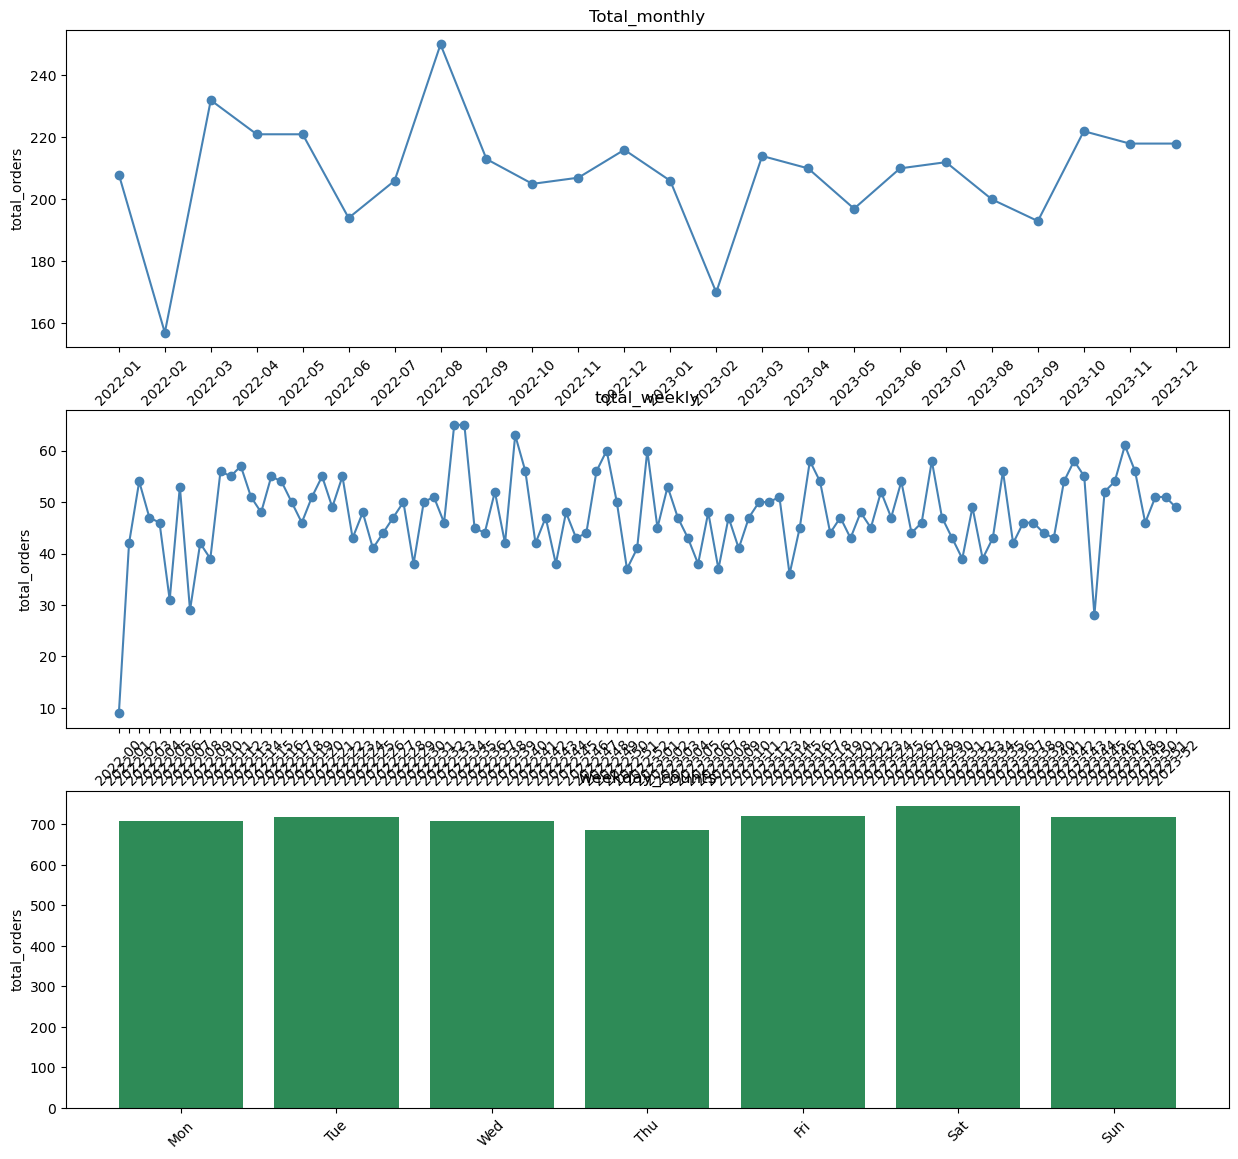

In [4]:
fig, axes = plt.subplots(3,1, figsize=(15,14))

##월별 트렌드

axes[0].plot(total_monthly['year_month'].astype(str), total_monthly['total_orders'], marker='o',color='steelblue')
axes[0].set_title('Total_monthly')
axes[0].set_ylabel('total_orders')
axes[0].tick_params(axis='x', rotation=45)


# 주별 트렌드
axes[1].plot(total_weekly['year_week'].astype(str), total_weekly['total_orders'], marker='o',color='steelblue')
axes[1].set_title('total_weekly')
axes[1].set_ylabel('total_orders')
axes[1].tick_params(axis='x', rotation=45)

# 요일별 트렌드
axes[2].bar(weekday_counts['weekday_label'].astype(str), weekday_counts['total_orders'],color='seagreen')
axes[2].set_title('weekday_counts')
axes[2].set_ylabel('total_orders')
axes[2].tick_params(axis='x', rotation=45)

In [5]:
total_monthly.head()

,year_month,total_orders
0,2022-01,208
1,2022-02,157
2,2022-03,232
3,2022-04,221
4,2022-05,221


In [6]:
total_weekly.head()

,year_week,total_orders
0,2022-00,9
1,2022-01,42
2,2022-02,54
3,2022-03,47
4,2022-04,46


In [7]:
weekday_counts.head()

,weekday,total_orders,weekday_label
0,0,707,Mon
1,1,719,Tue
2,2,707,Wed
3,3,685,Thu
4,4,720,Fri


### RFM

### RFM 분석 코드 요약

이 코드는 **RFM 분석**을 위한 고객별 데이터 전처리 및 계산을 수행합니다.

1. **기준일 설정**: 가장 최근 주문일에 하루를 더해 `snapshot_date`를 설정.
   ```python
   snapshot_date = df_orders['order_date'].max() + timedelta(days=1)
   ```
2.	**RFM 계산**:
	•	Recency: 고객의 마지막 주문일과 기준일 간의 차이 (얼마나 최근에 주문했는지).
	•	Frequency: 고객이 주문한 횟수.
	•	Monetary: 고객의 총 구매 금액.  
    ```python
    rfm = df_orders.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'amount': 'sum'
    })
    ```
3. 	결과 정리: 계산된 값들을 Recency, Frequency, Monetary로 이름을 바꾸고, 인덱스를 초기화하여 결과를 출력.
    ```python
    rfm = rfm.rename(columns={
        'order_date': 'Recency',
        'customer_id': 'Frequency',
        'amount': 'Monetary'
    }).reset_index()
    ```

결과적으로, 각 고객에 대해 최근성(Recency), 빈도(Frequency), 금액(Monetary) 지표를 계산하여 RFM 분석 데이터를 만듭니다.

In [18]:
from datetime import timedelta

## 기준일 설정 가장 마지막일 주문 +1 기준으로 본다 (오늘기준)
snapshot_date=df_orders['order_date'].max() + timedelta(days=1)

###rfm 계산

rfm=df_orders.groupby('customer_id').agg({
    'order_date' : lambda x :(snapshot_date -x.max()).days,
    'customer_id':'count', # 주문번호가 만들지 않아서 이번에는 customer_id로 하는 것
    'amount' :'sum'    
}).rename(columns = {
    'order_date':'Recency',
    'customer_id':'Frequency',
    'amount':'Monetary'
}).reset_index()

In [9]:
rfm

,customer_id,Recency,Frequency,Monetary
0,C0001,163,10,1153.44
1,C0002,19,10,1175.34
2,C0003,49,7,458.09
3,C0004,72,15,1336.49
4,C0005,45,17,1778.77
...,...,...,...,...
495,C0496,30,11,1062.86
496,C0497,69,12,763.50
497,C0498,166,8,1189.65
498,C0499,109,10,881.96


Text(0.5, 0, 'Purchase')

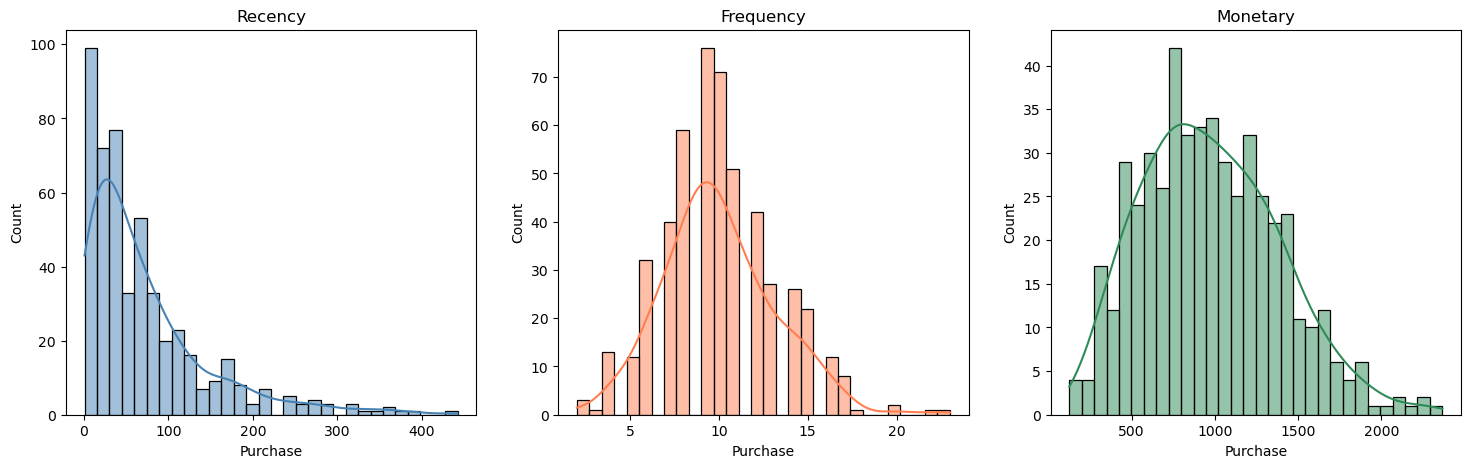

In [10]:
## rfm의 수치에 대한 주기는 월별 기준에 따라 달라진다.
import seaborn as sns

plt.figure(figsize=(18,5))

##Recency
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins = 30, kde=True, color='steelblue')
plt.title('Recency')
plt.xlabel('Purchase')

##Recency
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins = 30, kde=True, color='coral')
plt.title('Frequency')
plt.xlabel('Purchase')

##Recency
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins = 30, kde=True, color='seagreen')
plt.title('Monetary')
plt.xlabel('Purchase')

In [11]:
## 통계적인 분포 모형 불러오기

from scipy.stats import expon, poisson, gamma

## 평균의 기반으로 파라미터 추정 
labmda_r=1/rfm['Recency'].mean()
mu_f=rfm['Frequency'].mean()
a_m, loc_m, scale_m=gamma.fit(rfm['Monetary'], floc=0)

## 확률을 계산해 보자!

rfm['recency_prob']=expon.cdf(rfm['Recency'], scale=1/ labmda_r)
rfm['frequency_prob']= poisson.pmf(rfm['Frequency'], mu=mu_f)
rfm['monetary_prob']= gamma.cdf(rfm['Monetary'], a=a_m, loc= loc_m, scale =scale_m)

### RFM 분석 확률 계산 코드 설명

이 코드는 **RFM 분석**을 바탕으로 각 고객의 **확률 분포 모델**을 적용하여 확률을 계산하는 과정입니다. 고객의 **최근성(Recency)**, **빈도(Frequency)**, **금액(Monetary)**에 대한 확률을 추정합니다.

---

### 1. **확률 분포 모형 불러오기**
    ```python
    from scipy.stats import expon, poisson, gamma
    ```
- scipy.stats에서 지수분포(expon), 포아송 분포(poisson), 감마 분포(gamma)를 불러옵니다.
- 각 지표에 맞는 확률 분포를 적용하기 위해 사용됩니다.

### 2. 파라미터 추정
    ```python
    labmda_r = 1 / rfm['Recency'].mean()
    mu_f = rfm['Frequency'].mean()
    a_m, loc_m, scale_m = gamma.fit(rfm['Monetary'], floc=0)
    ```
- Recency (최근성):
•	lambda_r는 지수분포의 파라미터를 추정합니다. 1 / 평균 값을 lambda_r로 설정합니다.
- Frequency (빈도):
•	포아송 분포의 평균(mu_f)을 빈도의 평균으로 설정합니다.
- Monetary (금액):
•	감마 분포에 맞게 gamma.fit() 함수로 금액의 파라미터(a_m, loc_m, scale_m)를 추정합니다. floc=0은 감마 분포의 위치 파라미터를 0으로 고정합니다.
### 3. 확률 계산
    ```python
    rfm['recency_prob'] = expon.cdf(rfm['Recency'], scale=1 / labmda_r)
    rfm['frequency_prob'] = poisson.pmf(rfm['Frequency'], mu=mu_f)
    rfm['monetary_prob'] = gamma.cdf(rfm['Monetary'], a=a_m, loc=loc_m, scale=scale_m)
    ```
- Recency 확률
	•	지수분포의 누적 분포 함수(cdf)를 사용하여 고객의 최근성에 대한 확률을 계산합니다.
	•	scale은 1 / lambda_r로 설정됩니다.
- Frequency 확률
	•	포아송 분포의 확률 질량 함수(pmf)를 사용하여 고객의 빈도에 대한 확률을 계산합니다.
	•	mu는 빈도의 평균값(mu_f)입니다.
- Monetary 확률
	•	감마 분포의 누적 분포 함수(cdf)를 사용하여 고객의 금액에 대한 확률을 계산합니다.
	•	파라미터는 a_m, loc_m, scale_m입니다.

이 코드는 RFM 지표에 대해 각기 다른 확률 분포 모델(지수분포, 포아송 분포, 감마 분포)을 적용하여 각 고객의 특성에 맞는 확률을 계산하는 과정


In [19]:
rfm

,customer_id,Recency,Frequency,Monetary
0,C0001,163,10,1153.44
1,C0002,19,10,1175.34
2,C0003,49,7,458.09
3,C0004,72,15,1336.49
4,C0005,45,17,1778.77
...,...,...,...,...
495,C0496,30,11,1062.86
496,C0497,69,12,763.50
497,C0498,166,8,1189.65
498,C0499,109,10,881.96


In [13]:
a_m

5.0504969448985175

In [14]:
mu_f

10.0

In [15]:
scale_m

192.68543088279287

In [16]:
df_orders

,customer_id,order_date,amount,category,device,discount_used,channel,year_month,year_week,weekday
0,C0328,2022-04-13,159.23,Electronics,Mobile,0,Website,2022-04,2022-15,2
1,C0378,2022-09-28,131.67,Electronics,Desktop,1,Website,2022-09,2022-39,2
2,C0217,2023-12-02,90.84,Electronics,Mobile,0,App,2023-12,2023-48,5
3,C0014,2022-05-02,16.96,Books,Mobile,0,App,2022-05,2022-18,0
4,C0113,2022-11-27,61.48,Grocery,Mobile,1,Website,2022-11,2022-48,6
...,...,...,...,...,...,...,...,...,...,...
4995,C0313,2023-02-28,283.25,Grocery,Desktop,0,Website,2023-02,2023-09,1
4996,C0387,2023-01-17,20.56,Beauty,Mobile,0,App,2023-01,2023-03,1
4997,C0457,2023-11-05,516.52,Sports,Mobile,0,Website,2023-11,2023-45,6
4998,C0392,2022-10-04,15.00,Grocery,Mobile,1,App,2022-10,2022-40,1
